In [1]:
#packages
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
import io
from scipy import misc
from IPython.display import Image

%matplotlib inline

#loading input csv file
data = pd.read_csv('../Biomechanical_Data_column_2C_weka.csv')
len(data)
data.shape
#data1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(310, 7)

In [14]:
target_map = {'Abnormal':0, 'Normal':1 }
data['class'] = data['class'].apply(lambda x: target_map[x])

In [18]:
train,test = train_test_split(data,test_size=0.3225,random_state=210)
print("Training size:{} ; Test size:{}".format(len(train), len(test)))
#train

Training size:210 ; Test size:100


In [19]:
c = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=3,random_state=210)
featuresList = ["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis"]
X_train = train[featuresList]
Y_train = train["class"]

X_test = test[featuresList]
Y_test = test["class"]

In [20]:
dt = c.fit(X_train, Y_train)

In [21]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


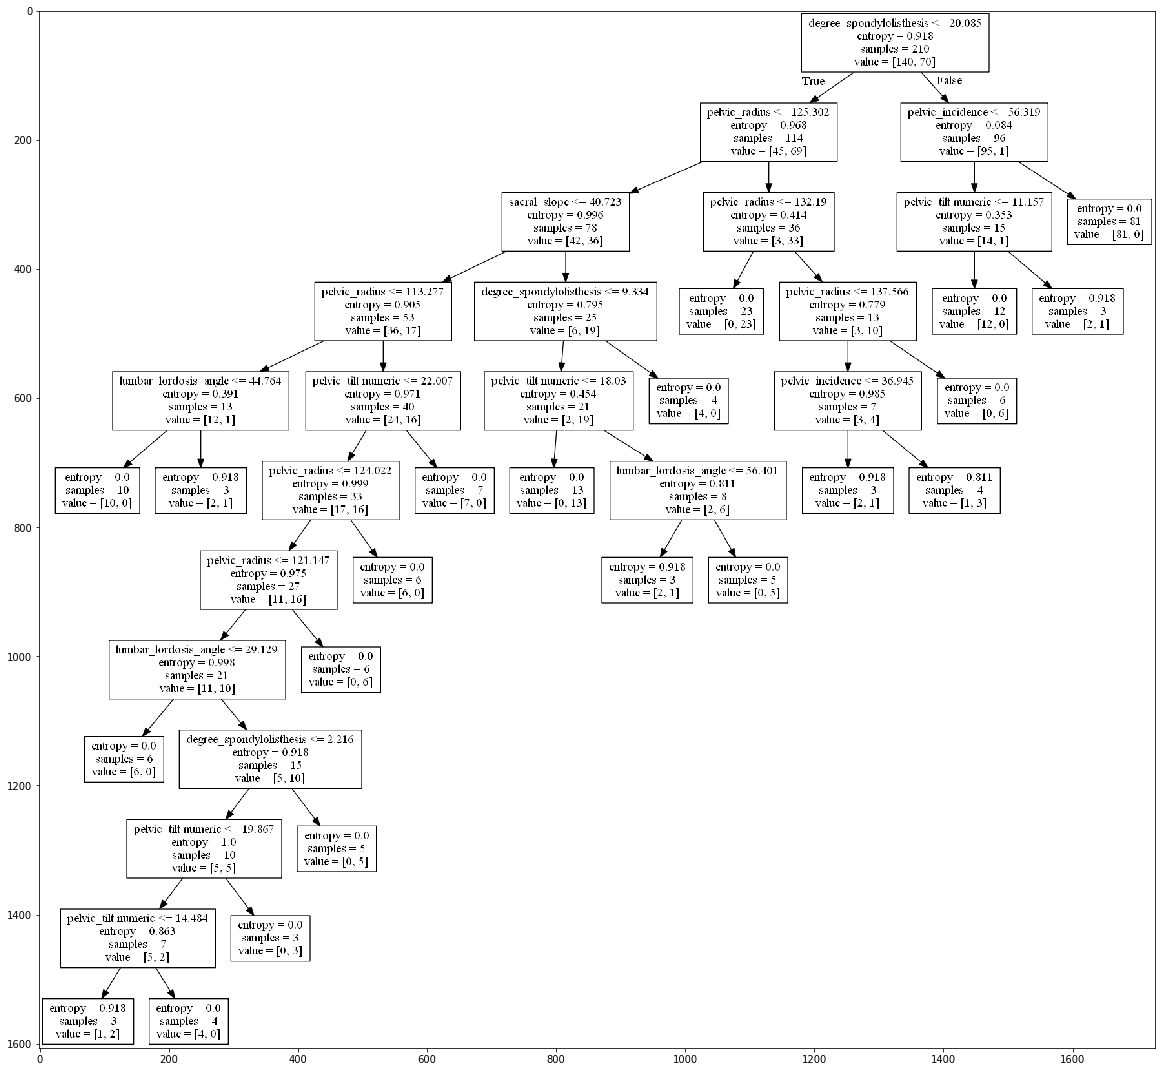

In [22]:
show_tree(dt,featuresList,'./DecisionTrees/1a/1a_DecisionTree_LeafSamples_3.png')

In [23]:
Y_pred = c.predict(X_test)

In [24]:
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [25]:
print('Test Accuracy Score : ',accuracy_score(Y_test,Y_pred)*100)

Test Accuracy Score :  84.0


In [26]:
Y_pred_t = c.predict(X_train)

In [27]:
Y_pred_t

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
print('Train Accuracy Score : ',accuracy_score(Y_train,Y_pred_t)*100)

Train Accuracy Score :  97.14285714285714


In [29]:
print('Confusion Matrix : ',confusion_matrix(Y_test,Y_pred))

Confusion Matrix :  [[60 10]
 [ 6 24]]


In [30]:
print('Classification Report : ',classification_report(Y_test,Y_pred))

Classification Report :               precision    recall  f1-score   support

          0       0.91      0.86      0.88        70
          1       0.71      0.80      0.75        30

avg / total       0.85      0.84      0.84       100



In [31]:
print('Precision Score : ',precision_score(Y_test,Y_pred,average='macro')*100)

Precision Score :  80.74866310160428


In [32]:
print('Recall Score : ',recall_score(Y_test,Y_pred,average='macro')*100)

Recall Score :  82.85714285714285


In [33]:
print('F1 Score : ',f1_score(Y_test,Y_pred,average='macro')*100)

F1 Score :  81.61764705882352


In [34]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()

In [35]:
tn

60

In [36]:
fp

10